## Importing libraries and data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
warnings.filterwarnings(action='ignore')
data = pd.read_csv('stroke-dataset.csv')
data.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


# Data Cleaning

In [2]:
data_row_count, data_column_count = data.shape
print('Row Count:', data_row_count)
print('Column Count:', data_column_count)

Row Count: 5110
Column Count: 12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.id.nunique()

5110

In [6]:
data = data.drop(columns ='id')
data.shape

(5110, 11)

In [7]:
data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [8]:
data['gender'] = data['gender'].replace('Other', list(data.gender.mode().values)[0])
data.gender.value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

# EDA

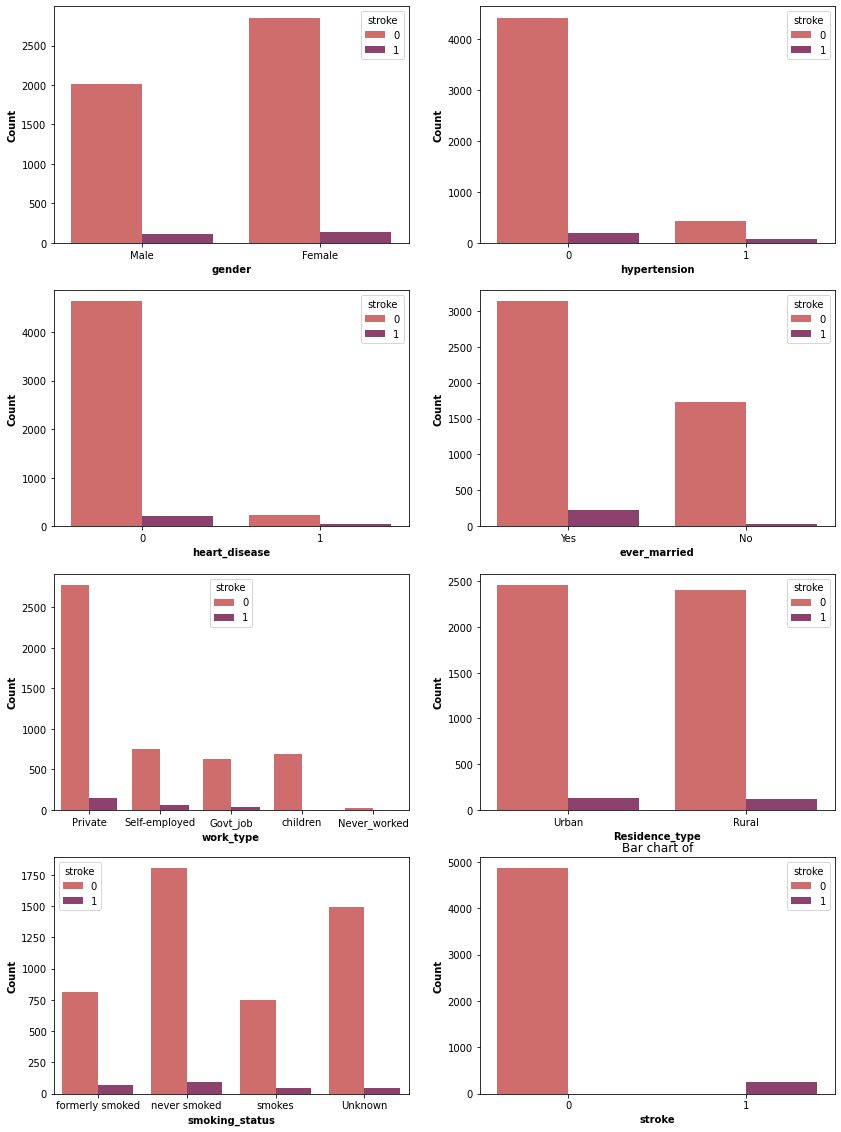

In [9]:
df_cat = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']

fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()

for i, col_name in enumerate(df_cat):
    sns.countplot(x=col_name, data=data, ax=axs[i], hue =data['stroke'], palette = 'flare')
    plt.title("Bar chart of")
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')

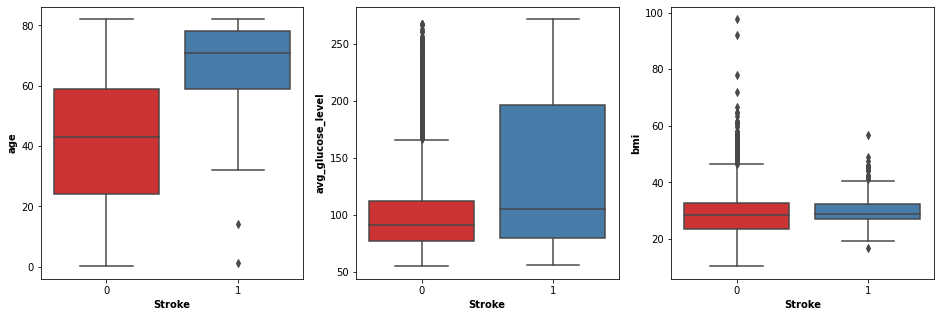

In [10]:
df_num = ['age', 'avg_glucose_level', 'bmi']

fig, axs = plt.subplots(1, 3, figsize=(16,5))
axs = axs.flatten()

# iterate through each column in df_num and plot
for i, col_name in enumerate(df_num):
    sns.boxplot(x="stroke", y=col_name, data=data, ax=axs[i],  palette = 'Set1')
    axs[i].set_xlabel("Stroke", weight = 'bold')
    axs[i].set_ylabel(f"{col_name}", weight='bold')

In [11]:
bmi_outliers=data.loc[data['bmi']>50]
bmi_outliers['bmi'].shape
#since bmi higher than 50 is normally impossible and meaning that 50 is already high. 
#there are 79 people who's bmi is higher than 50 

(79,)

In [12]:
#I set all of them to 50 to make sure no much outlining in the dataset
data["bmi"] = pd.to_numeric(data["bmi"])
data["bmi"] = data["bmi"].apply(lambda x: 50 if x>50 else x)

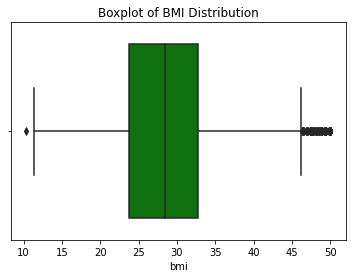

In [13]:
sns.boxplot(data=data,x=data["bmi"],color='green')
plt.title("Boxplot of BMI Distribution");

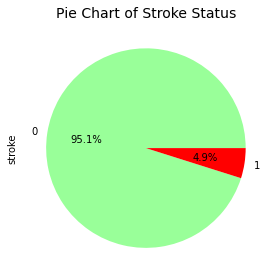

In [14]:
plt.figure(figsize=(4,4))
data['stroke'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['#99ff99','#FF0000'])
plt.title("Pie Chart of Stroke Status", fontdict={'fontsize': 14})
plt.tight_layout()

In [15]:
le = LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

df_en = data
df_en.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


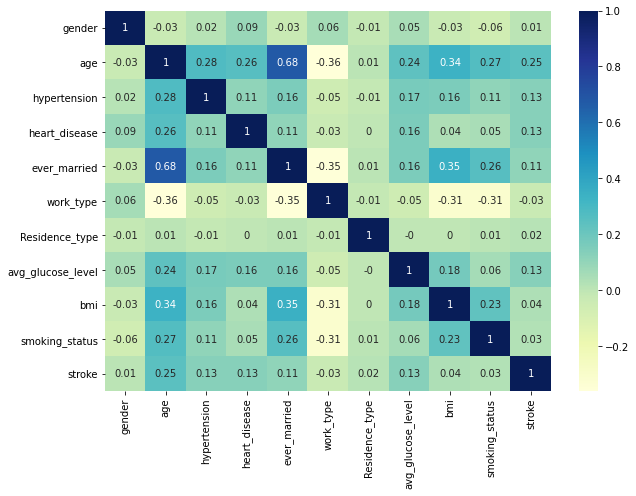

In [16]:
corr = df_en.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu');

In [17]:
#multicollinearity observed on ever_married and age contains more than just 1 or 0 so would drop ever_married
df_en = df_en.drop(['ever_married'], axis = 1)
df_en.head(3)

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,2,0,105.92,32.500000,2,1


In [18]:

s = StandardScaler()
columns = ['avg_glucose_level','bmi','age']
stand_scaled = s.fit_transform(df_en[['avg_glucose_level','bmi','age']])
stand_scaled = pd.DataFrame(stand_scaled,columns=columns)

df_en=df_en.drop(columns=columns,axis=1)
stand_scaled.head()

,avg_glucose_level,bmi,age
0,2.706375,1.066746,1.051434
1,2.121559,0.013363,0.786070
2,-0.005028,0.506346,1.626390
3,1.437358,0.766044,0.255342
4,1.501184,-0.655458,1.582163


In [19]:
df = pd.concat([df_en, stand_scaled], axis=1)
df.head(3)

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,avg_glucose_level,bmi,age
0,1,0,1,2,1,1,1,2.706375,1.066746,1.051434
1,0,0,0,3,0,2,1,2.121559,0.013363,0.786070
2,1,0,1,2,0,2,1,-0.005028,0.506346,1.626390


# Modelling

In [20]:
x=df.drop(['stroke'], axis=1)
y=df['stroke']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 124)

In [21]:
models = dict()
models['Decision Tree'] = DecisionTreeClassifier()
models['Logreg'] = LogisticRegression()
models['Support Vector Machine'] = SVC(kernel = 'sigmoid', gamma='scale')
models['kNN'] = KNeighborsClassifier()
models['Naive Bayes'] = GaussianNB()
models['KMeans'] = KMeans(n_clusters=2, n_init=10, random_state=42)

for model in models:
    models[model].fit(x_train, y_train)
    print(model + " fitting done")


Decision Tree fitting done
Logreg fitting done
Support Vector Machine fitting done
kNN fitting done
Naive Bayes fitting done
KMeans fitting done


In [22]:
print("Test Set Prediction:\n")

for x in models:

    print('-'*20+x+'-'*20)
    model = models[x]
    y_pred = model.predict(x_test)
    arg_test = {'y_true':y_test, 'y_pred':y_pred}
    print(confusion_matrix(**arg_test))
    print(classification_report(**arg_test))

print("done predicting")

Test Set Prediction:

--------------------Decision Tree--------------------
[[1391   73]
 [  63    6]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1464
           1       0.08      0.09      0.08        69

    accuracy                           0.91      1533
   macro avg       0.52      0.52      0.52      1533
weighted avg       0.92      0.91      0.91      1533

--------------------Logreg--------------------
[[1464    0]
 [  69    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533

--------------------Support Vector Machine--------------------
[[1412   52]
 [  64    5]]
              precision    recall  f1-score   support

           0       0.96 

In [23]:
print('Summary of Accuracy Score\n\n')
for i in models:
    model = models[i]
    print(i + ' Model: ',accuracy_score(y_test, model.predict(x_test)).round(4))

Summary of Accuracy Score


Decision Tree Model:  0.9113
Logreg Model:  0.955
Support Vector Machine Model:  0.9243
kNN Model:  0.9524
Naive Bayes Model:  0.8728
KMeans Model:  0.7834


# Cross Validation

Cross validation is provided here to see the performance

In [26]:
dtc = DecisionTreeClassifier()
log = LogisticRegression()
SVC = SVC(kernel = 'sigmoid', gamma='scale')
KNN = KNeighborsClassifier()
gnb = GaussianNB()
Km = KMeans(n_clusters=2, n_init=10, random_state=42)
#cause 90% or above is just too high might cause type 2 error so going for Naive Bayes cause it is above 80 and do what we want

print("done predicting")
dtc_scores = cross_val_score(dtc, x_train, y_train, cv = 15, scoring='accuracy')
log_scores = cross_val_score(log, x_train, y_train, cv = 15, scoring='accuracy')
SVC_scores = cross_val_score(SVC, x_train, y_train, cv = 15, scoring='accuracy')
KNN_scores = cross_val_score(KNN, x_train, y_train, cv = 15, scoring='accuracy')
gnb_scores = cross_val_score(gnb, x_train, y_train, cv = 15, scoring='accuracy')
Km_scores = cross_val_score(Km, x_train, y_train, cv = 15, scoring='accuracy')

print('Cross-validation scores:{}'.format(dtc_scores))
print('Cross-validation scores:{}'.format(log_scores))
print('Cross-validation scores:{}'.format(SVC_scores))
print('Cross-validation scores:{}'.format(KNN_scores))
print('Cross-validation scores:{}'.format(gnb_scores))
print('Cross-validation scores:{}'.format(Km_scores))

done predicting
Cross-validation scores:[0.89539749 0.91631799 0.87447699 0.92050209 0.92050209 0.89121339
 0.93305439 0.89915966 0.8907563  0.91176471 0.91176471 0.91596639
 0.89915966 0.88655462 0.93277311]
Cross-validation scores:[0.94979079 0.94979079 0.94979079 0.9539749  0.94979079 0.94979079
 0.94979079 0.94957983 0.94957983 0.94957983 0.94957983 0.94957983
 0.94957983 0.94957983 0.94957983]
Cross-validation scores:[0.92887029 0.94560669 0.91631799 0.90794979 0.90794979 0.92887029
 0.92050209 0.94117647 0.91596639 0.91176471 0.92436975 0.92016807
 0.93277311 0.91176471 0.91596639]
Cross-validation scores:[0.94979079 0.94560669 0.94979079 0.94560669 0.94979079 0.94142259
 0.94560669 0.94117647 0.94537815 0.94957983 0.94537815 0.94537815
 0.94537815 0.94117647 0.94957983]
Cross-validation scores:[0.86192469 0.88284519 0.84937238 0.89958159 0.85355649 0.89121339
 0.89121339 0.90336134 0.87815126 0.86554622 0.86554622 0.8697479
 0.86554622 0.85294118 0.8697479 ]
Cross-validation sco

In [31]:
print('Summary of Accuracy Score\n')
for i in models:
    model = models[i]
    print(i + ' Model: ',accuracy_score(y_test, model.predict(x_test)).round(4))
print('\nAll Average cross-validation score\n')
print('Average cross-validation score for decision tree classifier: {:.4f}'.format(dtc_scores.mean()))
print('Average cross-validation score for Logistic Regression: {:.4f}'.format(log_scores.mean()))
print('Average cross-validation score for SVC: {:.4f}'.format(SVC_scores.mean()))
print('Average cross-validation score for KNN: {:.4f}'.format(KNN_scores.mean()))
print('Average cross-validation score for Naive Bayes: {:.4f}'.format(gnb_scores.mean()))
print('Average cross-validation score for K-Mean: {:.4f}'.format(Km_scores.mean()))



Summary of Accuracy Score

Decision Tree Model:  0.9113
Logreg Model:  0.955
Support Vector Machine Model:  0.9243
kNN Model:  0.9524
Naive Bayes Model:  0.8728
KMeans Model:  0.7834

All Average cross-validation score

Average cross-validation score for decision tree classifier: 0.9066
Average cross-validation score for Logistic Regression: 0.9500
Average cross-validation score for SVC: 0.9220
Average cross-validation score for KNN: 0.9460
Average cross-validation score for Naive Bayes: 0.8734
Average cross-validation score for K-Mean: 0.6957
